In [137]:
import pandas as pd

In [138]:
metadata_df = pd.read_csv(r"C:\Users\admin\Desktop\Zomato Project\Zomato Restaurant names and Metadata.csv")
reviews_df = pd.read_csv(r"C:\Users\admin\Desktop\Zomato Project\Zomato Restaurant reviews.csv")

In [139]:
print("\n Restaurant Metadata:")
print(metadata_df.head())

print("\n Restaurant Reviews:")
print(reviews_df.head())


 Restaurant Metadata:
                             Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links   Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...    800   
1  https://www.zomato.com/hyderabad/paradise-gach...    800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                      

In [140]:
print("\n Metadata Info:")
metadata_df.info()

print("\n Reviews Info:")
reviews_df.info()


 Metadata Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.1+ KB

 Reviews Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)


In [141]:
print("\n Missing Values in Metadata:")
print(metadata_df.isnull().sum())

print("\n Missing Values in Reviews:")
print(reviews_df.isnull().sum())


 Missing Values in Metadata:
Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

 Missing Values in Reviews:
Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64


In [142]:
print(" Metadata columns:", metadata_df.columns.tolist())
print(" Reviews columns:", reviews_df.columns.tolist())


 Metadata columns: ['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings']
 Reviews columns: ['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures']


In [143]:
metadata_df = metadata_df.rename(columns={'Name': 'Restaurant'})
merged_df = pd.merge(reviews_df, metadata_df, on='Restaurant', how='inner')

In [144]:
print("\n Merged Data (first 5 rows):")
print(merged_df[['Restaurant', 'Review', 'Cost', 'Cuisines']].head())


 Merged Data (first 5 rows):
        Restaurant                                             Review Cost  \
0  Beyond Flavours  The ambience was good, food was quite good . h...  800   
1  Beyond Flavours  Ambience is too good for a pleasant evening. S...  800   
2  Beyond Flavours  A must try.. great food great ambience. Thnx f...  800   
3  Beyond Flavours  Soumen das and Arun was a great guy. Only beca...  800   
4  Beyond Flavours  Food is good.we ordered Kodi drumsticks and ba...  800   

                                            Cuisines  
0  Chinese, Continental, Kebab, European, South I...  
1  Chinese, Continental, Kebab, European, South I...  
2  Chinese, Continental, Kebab, European, South I...  
3  Chinese, Continental, Kebab, European, South I...  
4  Chinese, Continental, Kebab, European, South I...  


In [145]:
print(f"\n Merged rows count: {merged_df.shape[0]}")


 Merged rows count: 10000


In [146]:
import re
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
def clean_text(text):
    if pd.isnull(text):
        return ""
    
    
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    words = text.split()
    words = [word for word in words if word not in stop_words]

    return ' '.join(words)

merged_df['Cleaned Review'] = merged_df['Review'].apply(clean_text)

print("\n Sample of Cleaned Reviews:")
print(merged_df[['Review', 'Cleaned Review']].head())


 Sample of Cleaned Reviews:
                                              Review  \
0  The ambience was good, food was quite good . h...   
1  Ambience is too good for a pleasant evening. S...   
2  A must try.. great food great ambience. Thnx f...   
3  Soumen das and Arun was a great guy. Only beca...   
4  Food is good.we ordered Kodi drumsticks and ba...   

                                      Cleaned Review  
0  ambience good food quite good saturday lunch c...  
1  ambience good pleasant evening service prompt ...  
2  must try great food great ambience thnx servic...  
3  soumen das arun great guy behavior sincerety g...  
4  food goodwe ordered kodi drumsticks basket mut...  


In [147]:
!pip install textblob

Defaulting to user installation because normal site-packages is not writeable


In [148]:
from textblob import TextBlob

def get_sentiment(text):
    if not text or text.strip() == "":
        return 0.0, 'Neutral'
    
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity

    if polarity > 0:
        label = 'Positive'
    elif polarity < 0:
        label = 'Negative'
    else:
        label = 'Neutral'
    
    return polarity, label

merged_df[['Polarity', 'Sentiment']] = merged_df['Cleaned Review'].apply(
    lambda x: pd.Series(get_sentiment(x))
)
print("\n Sample Sentiment Analysis:")
print(merged_df[['Review', 'Cleaned Review', 'Polarity', 'Sentiment']].head())


 Sample Sentiment Analysis:
                                              Review  \
0  The ambience was good, food was quite good . h...   
1  Ambience is too good for a pleasant evening. S...   
2  A must try.. great food great ambience. Thnx f...   
3  Soumen das and Arun was a great guy. Only beca...   
4  Food is good.we ordered Kodi drumsticks and ba...   

                                      Cleaned Review  Polarity Sentiment  
0  ambience good food quite good saturday lunch c...  0.660000  Positive  
1  ambience good pleasant evening service prompt ...  0.708333  Positive  
2  must try great food great ambience thnx servic...  0.550000  Positive  
3  soumen das arun great guy behavior sincerety g...  0.750000  Positive  
4  food goodwe ordered kodi drumsticks basket mut...  0.525000  Positive  


In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

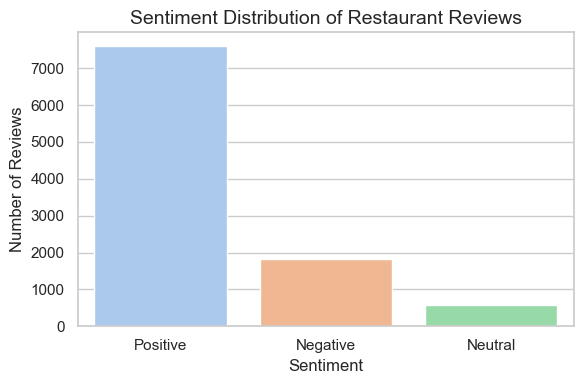

In [150]:
plt.figure(figsize=(6, 4))
sns.countplot(data=merged_df, x='Sentiment', hue='Sentiment', palette='pastel', legend=False)

plt.title("Sentiment Distribution of Restaurant Reviews", fontsize=14)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)
plt.tight_layout()
plt.show()

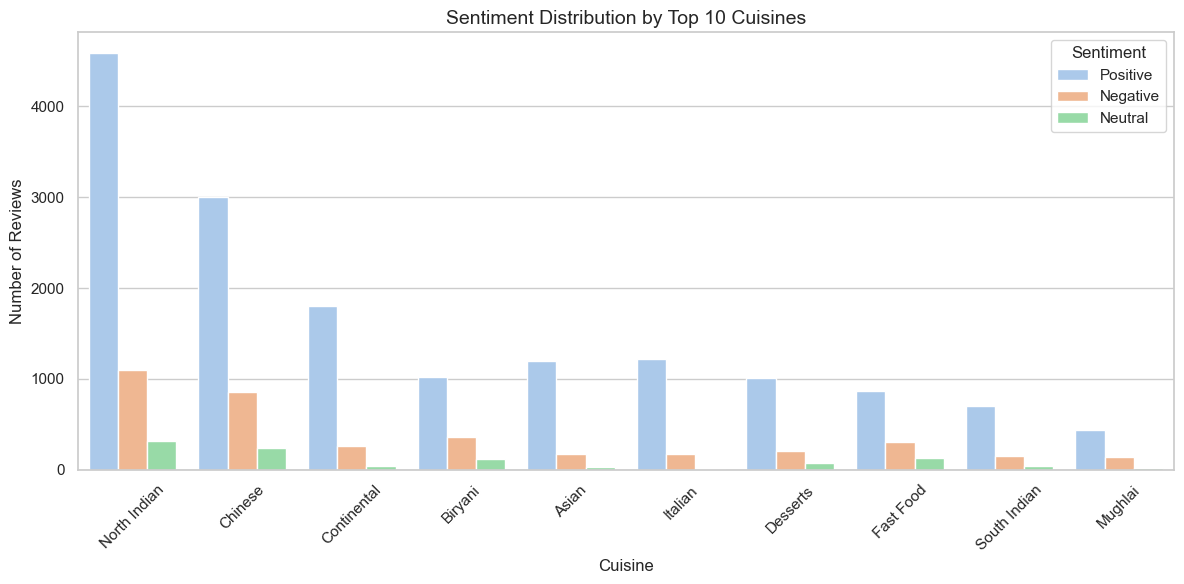

In [151]:
filtered_df = merged_df.dropna(subset=['Cuisines'])
filtered_df['Cuisine List'] = filtered_df['Cuisines'].str.split(', ')
exploded_df = filtered_df.explode('Cuisine List').reset_index(drop=True)

plt.figure(figsize=(12, 6))
sns.countplot(
    data=exploded_df,
    x='Cuisine List',
    hue='Sentiment',
    order=exploded_df['Cuisine List'].value_counts().head(10).index,
    palette='pastel'
)
plt.title("Sentiment Distribution by Top 10 Cuisines", fontsize=14)
plt.xlabel("Cuisine", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

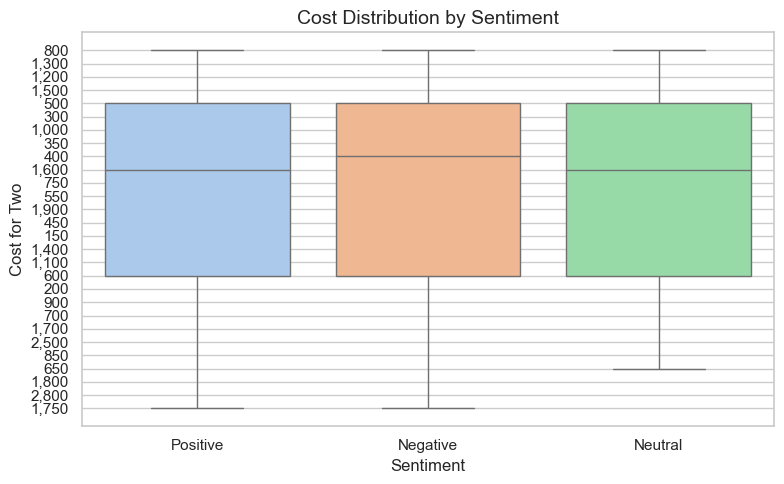

In [152]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=merged_df,
    x='Sentiment',
    y='Cost',
    hue='Sentiment',
    palette='pastel',
    legend=False
)
plt.title("Cost Distribution by Sentiment", fontsize=14)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Cost for Two", fontsize=12)
plt.tight_layout()
plt.show()

In [153]:
print("Available Restaurant Names (first 30):\n")
print(merged_df['Restaurant'].dropna().unique()[:30])

Available Restaurant Names (first 30):

['Beyond Flavours' 'Paradise' 'Flechazo' 'Shah Ghouse Hotel & Restaurant'
 'Over The Moon Brew Company' "The Fisherman's Wharf" 'eat.fit'
 'Shah Ghouse Spl Shawarma' 'Hyper Local' 'Cream Stone'
 "Sardarji's Chaats & More" 'Barbeque Nation' 'Absolute Sizzlers'
 'The Lal Street - Bar Exchange' "AB's - Absolute Barbecues" 'KFC'
 'NorFest - The Dhaba' 'Hotel Zara Hi-Fi' '10 Downing Street'
 'Pakwaan Grand' '13 Dhaba'
 "Jonathan's Kitchen - Holiday Inn Express & Suites" 'B-Dubs' 'Amul'
 'SKYHY' 'Tiki Shack' 'Mustang Terrace Lounge'
 "3B's - Buddies, Bar & Barbecue" 'Behrouz Biryani' 'Hunger Maggi Point']


In [154]:
def recommend(user_input, num_recommendations=5):
   
    unique_indices = merged_df.reset_index().drop_duplicates(subset=['Restaurant'])[['Restaurant', 'index']].set_index('Restaurant')['index']

    if user_input in unique_indices.index:
        idx = unique_indices[user_input]
    else:
        matches = merged_df[merged_df['Restaurant'].str.contains(user_input, case=False, na=False)]
        if matches.empty:
            print(f" No restaurant found containing '{user_input}'. Try a different keyword.")
            return pd.DataFrame()
        restaurant_name = matches.iloc[0]['Restaurant']
        print(f" Using matched restaurant: {restaurant_name}")
        idx = unique_indices.get(restaurant_name)
        if idx is None:
            print(" Match found but index missing.")
            return pd.DataFrame()

    sim_scores = list(enumerate(cosine_similarity(tfidf_matrix[idx], tfidf_matrix).flatten()))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:num_recommendations+1]
    restaurant_indices = [i[0] for i in sim_scores]

    return merged_df.iloc[restaurant_indices][['Restaurant', 'Cuisines', 'Cost', 'Sentiment']]

In [155]:
recommendations = recommend("Barbeque Nation", num_recommendations=5)
recommendations 

,Restaurant,Cuisines,Cost,Sentiment
4879,Udipi's Upahar,"South Indian, North Indian, Chinese",500,Positive
3198,Pista House,"Bakery, North Indian, Mughlai, Juices, Chinese","1,000",Positive
314,Shah Ghouse Hotel & Restaurant,"Biryani, North Indian, Chinese, Seafood, Bever...",800,Positive
1901,Pakwaan Grand,"North Indian, Chinese, Biryani",400,Positive
9621,Hyderabadi Daawat,"Hyderabadi, Chinese, Mughlai",600,Positive


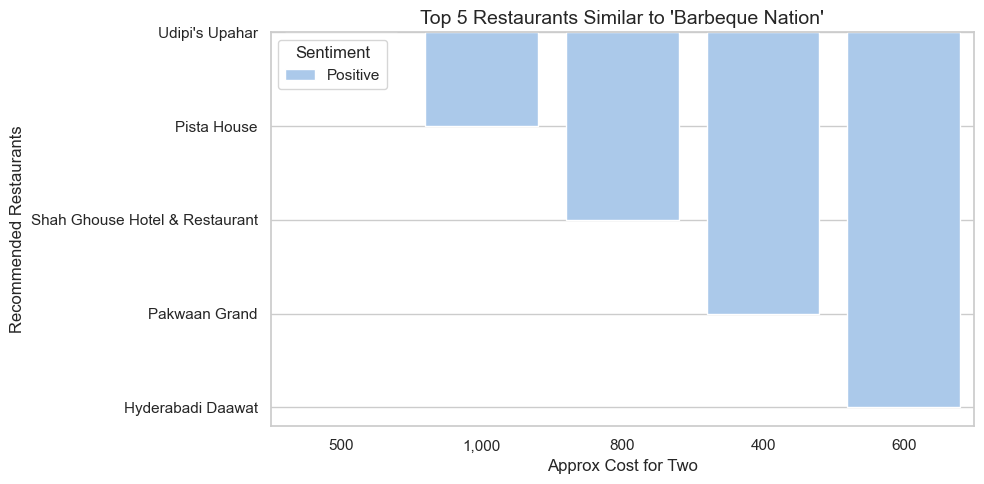

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt

if not recommendations.empty:
    plt.figure(figsize=(10, 5))
    sns.barplot(
        data=recommendations,
        x='Cost',
        y='Restaurant',
        hue='Sentiment',
        palette='pastel',
        dodge=False
    )
    plt.title(f"Top {len(recommendations)} Restaurants Similar to 'Barbeque Nation'", fontsize=14)
    plt.xlabel("Approx Cost for Two", fontsize=12)
    plt.ylabel("Recommended Restaurants", fontsize=12)
    plt.legend(title="Sentiment")
    plt.tight_layout()
    plt.show()
else:
    print(" No data to plot.")

In [157]:
recommendations.to_csv("Recommended_Restaurants.csv", index=False)
print("Recommendations saved as 'Recommended_Restaurants.csv'")

Recommendations saved as 'Recommended_Restaurants.csv'
